# An effective theory of collective deep learning

Lluís Arola Fernández and Lucas Lacasa

Last modification: October 13, 2023 


-------------


## Numerical integration of the effective dynamics 

In [2]:
import numpy as np
from scipy.integrate import solve_ivp

def ginzburg_landau(t, states, D, gamma, sigma, Exy):
    N = len(states)
    coupling = (sigma / N) * (states - states[:, None]).sum(axis=1)
    return -states**(2 * D + 1) + Exy * states**D - gamma * states + coupling

def compute_loss_ensemble(states, D, gamma, Exy):
    loss = np.power(states, 2*(D+1)) - 2*np.mean(Exy)*np.power(states, D+1)
    return loss

# main parameters 
N = 200
gamma = 0.001
t_span = (0, 10)
t_eval = np.linspace(0, 10, 100)
depths = [0,1,2]  
num_runs = 200

# quenched disorder distribution (normal distribution)
mean_delta = 0
std_delta = 2

# initial conditions (uniform in (-bound+epsilon,bound+epsilon))
bound = 2
epsilon = 0.3

# coupling values 
sigma_values0 = np.logspace(-2.2, -1,15)
sigma_values1 = np.logspace(-1,1,30)
sigma_values2 = np.logspace(1,2.2,15)
sigma_values = np.concatenate([sigma_values0,sigma_values1,sigma_values2])
#sigma_values = np.linspace(0,100,50)

# Dictionaries to store results
mean_magnetization = {}
mean_magnetization_adiabatic = {}
mean_loss = {}
mean_loss_adiabatic = {}

for D in depths:
    print(D)
    mean_magnetization[D] = np.zeros((num_runs, len(sigma_values)))
    mean_loss[D] = np.zeros((num_runs, len(sigma_values)))
    mean_magnetization_adiabatic[D] = np.zeros((num_runs, len(sigma_values)))
    mean_loss_adiabatic[D] = np.zeros((num_runs, len(sigma_values)))
    
    for run in range(num_runs):
        print('run',run)
        Exy = np.random.normal(mean_delta,std_delta,N)
        initial_states = np.random.uniform(-bound+epsilon,bound+epsilon,N)
        initial_states_adiabatic = np.random.uniform(-bound+epsilon,bound+epsilon,N)
        
        for i, sigma in enumerate(sigma_values):
            
            # Simulate system dynamics
            solution = solve_ivp(ginzburg_landau, t_span, initial_states, args=(D, gamma, sigma, Exy), method='RK45', t_eval=t_eval)
            solution_adiabatic = solve_ivp(ginzburg_landau, t_span, initial_states_adiabatic, args=(D, gamma, sigma, Exy), method='RK45', t_eval=t_eval)
            initial_states_adiabatic = np.copy(solution_adiabatic.y[:, -1])
            
            # Compute average magnetization over the second half of the process
            mean_magnetization[D][run, i] = np.abs(np.mean(solution.y[:, len(t_eval)//2:].mean(axis=0)))
            mean_magnetization_adiabatic[D][run, i] = np.abs(np.mean(solution_adiabatic.y[:, len(t_eval)//2:].mean(axis=0)))
            
            # Compute average effective loss over the second half of the process
            loss_values = compute_loss_ensemble(solution.y[:, len(t_eval)//2:], D, gamma, Exy)
            loss_values_adiabatic = compute_loss_ensemble(solution_adiabatic.y[:, len(t_eval)//2:], D, gamma, Exy)
            mean_loss[D][run, i] = np.mean(loss_values)
            mean_loss_adiabatic[D][run, i] = np.mean(loss_values_adiabatic)

0
run 0
run 1
run 2
run 3
run 4
run 5
run 6
run 7
run 8
run 9
run 10
run 11
run 12
run 13
run 14
run 15
run 16
run 17
run 18
run 19
run 20
run 21
run 22
run 23
run 24
run 25
run 26
run 27
run 28
run 29
run 30
run 31
run 32
run 33
run 34
run 35
run 36
run 37
run 38
run 39
run 40
run 41
run 42
run 43
run 44
run 45
run 46
run 47
run 48
run 49
run 50
run 51
run 52
run 53
run 54
run 55
run 56
run 57
run 58
run 59
run 60
run 61
run 62
run 63
run 64
run 65
run 66
run 67
run 68
run 69
run 70
run 71
run 72
run 73
run 74
run 75
run 76
run 77
run 78
run 79
run 80
run 81
run 82
run 83
run 84
run 85
run 86
run 87
run 88
run 89
run 90
run 91
run 92
run 93
run 94
run 95
run 96
run 97
run 98
run 99
run 100
run 101
run 102
run 103
run 104
run 105
run 106
run 107
run 108
run 109
run 110
run 111
run 112
run 113
run 114
run 115
run 116
run 117
run 118
run 119
run 120
run 121
run 122
run 123
run 124
run 125
run 126
run 127
run 128
run 129
run 130
run 131
run 132
run 133
run 134
run 135
run 136
run 137
run 

/var/folders/c5/kk81kmh50gn9bq1kf4_4mqhm0000gn/T/ipykernel_55970/2441566462.py:7: RuntimeWarning: overflow encountered in power
  return -states**(2 * D + 1) + Exy * states**D - gamma * states + coupling


run 2
run 3
run 4
run 5
run 6
run 7
run 8
run 9
run 10
run 11
run 12
run 13
run 14
run 15
run 16
run 17
run 18
run 19
run 20
run 21
run 22
run 23
run 24
run 25
run 26
run 27
run 28
run 29
run 30
run 31
run 32
run 33
run 34
run 35
run 36
run 37
run 38
run 39
run 40
run 41
run 42
run 43
run 44
run 45
run 46
run 47
run 48
run 49
run 50
run 51
run 52
run 53
run 54
run 55
run 56
run 57
run 58
run 59
run 60
run 61
run 62
run 63
run 64
run 65
run 66
run 67
run 68
run 69
run 70
run 71
run 72
run 73
run 74
run 75
run 76
run 77
run 78
run 79
run 80
run 81
run 82
run 83
run 84
run 85
run 86
run 87
run 88
run 89
run 90
run 91
run 92
run 93
run 94
run 95
run 96
run 97
run 98
run 99
run 100
run 101
run 102
run 103
run 104
run 105
run 106
run 107
run 108
run 109
run 110
run 111
run 112
run 113
run 114
run 115
run 116
run 117
run 118
run 119
run 120
run 121
run 122
run 123
run 124
run 125
run 126
run 127
run 128
run 129
run 130
run 131
run 132
run 133
run 134
run 135
run 136
run 137
run 138
run 139
ru

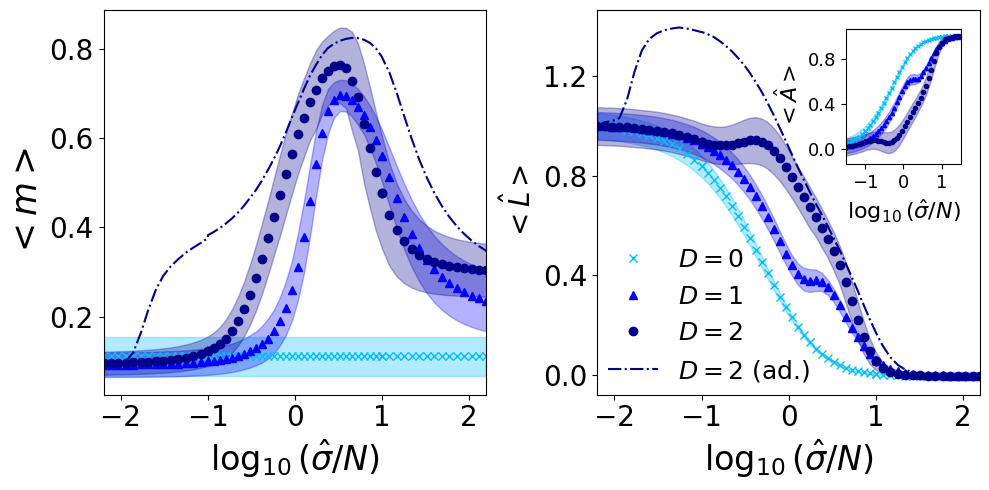

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def plot_for_gamma_and_metric(ax, metric_data, metric_data_adiabatic, metric, depths, sigma_values, inset=False):
    colors = ['deepskyblue', 'blue', 'darkblue']
    
    for depth, color in zip(depths, colors):
        mean_values = np.mean(metric_data[depth], axis=0)
        std_values = np.std(metric_data[depth], axis=0)
        
        mean_values_adiabatic = np.mean(metric_data_adiabatic[depth], axis=0)
        std_values_adiabatic = np.std(metric_data_adiabatic[depth], axis=0)

        # Normalize the loss by the loss at sigma = 0
        if metric == "losstest":
            normalization_factor = mean_values[0]
            mean_values /= normalization_factor
            std_values /= normalization_factor
            
            normalization_factor_adiabatic = mean_values_adiabatic[0]
            mean_values_adiabatic /= normalization_factor_adiabatic
            std_values_adiabatic /= normalization_factor_adiabatic
           
        #if metric == "magnetization":
            
        #        normalization_factor = depth+1
        #        mean_values /= normalization_factor
        #        std_values /= normalization_factor
                
        #        normalization_factor_adiabatic = depth+1
        #        mean_values_adiabatic /= normalization_factor_adiabatic
        #        std_values_adiabatic /= normalization_factor_adiabatic
                
            
        markers = ['x', '^', 'o']
        
        if not inset: 
            ax.plot(np.log10(sigma_values), mean_values, color=color, label=f"$D = {depth}$", marker=markers[depth], linestyle='', markersize=6)
            ax.fill_between(np.log10(sigma_values), mean_values-std_values/2, mean_values+std_values/2, color=color, alpha=0.3)
        
        if inset: 
            
            ax.plot(np.log10(sigma_values), 1-mean_values, color=color, label=f"$D = {depth}$", marker=markers[depth], linestyle='', markersize=3)
            ax.fill_between(np.log10(sigma_values), 1-mean_values-std_values/2, 1-mean_values+std_values/2, color=color, alpha=0.3)
        
        
        # Plot the adiabatic line for all depths but only label it for the last depth
        if not inset: 
            if depth == depths[-1]:
                ax.plot(np.log10(sigma_values), mean_values_adiabatic, color=color, label="$D=2$ (ad.)", marker='None', linestyle='-.')
            #else:
            #    ax.plot(np.log10(sigma_values), mean_values_adiabatic, color=color, marker='None', linestyle='-.')

        ax.set_xlim([-2.2,2.2])
        
        if inset:
            ax.set_xlim([-1.5, 1.5])
            
    if metric == "magnetization":
        ax.set_ylabel('$< m >$', fontsize=25)
        ax.set_xlabel('$\log_{10}(\hat{\sigma}/N)$', fontsize=24)
        #ax.set_ylim([0,1])
    else:
        ax.set_ylabel('$< \hat{L}>$', fontsize=20)
        ax.set_xlabel('$\log_{10}(\hat{\sigma}/N)$', fontsize=24)
        if inset: 
            
            ax.set_ylabel('$< \hat{A}>$', fontsize=16)
            ax.set_xlabel('$\log_{10}(\hat{\sigma}/N)$', fontsize=16)
            
    # Set number of ticks
    if inset:
        ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=3))
        ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=3))
    else:
        ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
        ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
        
    # Increase the size of the numbers in the axes
    ax.tick_params(axis='both', which='major', labelsize=20)

    if inset: 
        ax.tick_params(axis='both', which='major', labelsize=13)
    # Add legend
    if not inset:
        handles, labels = ax.get_legend_handles_labels()
        if metric == "losstest":
            ax.legend(handles, labels, loc='lower left', frameon=False, fontsize=18,bbox_to_anchor=(-0.03, -0.03))
        #else:
        #    ax.legend(handles, labels, loc='upper left', frameon=False, fontsize=16,bbox_to_anchor=(-0.05, 1))

# Plotting
fig, axes = plt.subplots(1,2, figsize=(10,5))

# Plot mean magnetization
plot_for_gamma_and_metric(axes[0], mean_magnetization, mean_magnetization_adiabatic, "magnetization", depths, sigma_values)

# Plot mean loss
plot_for_gamma_and_metric(axes[1], mean_loss, mean_loss_adiabatic, "losstest", depths, sigma_values)

# Inset for the second plot
axins = axes[1].inset_axes([0.65, 0.60, 0.30, 0.35]) # [x, y, width, height] of the inset plot
plot_for_gamma_and_metric(axins, mean_loss, mean_loss_adiabatic, "losstest", depths, sigma_values, inset=True)

plt.tight_layout()
plt.show()



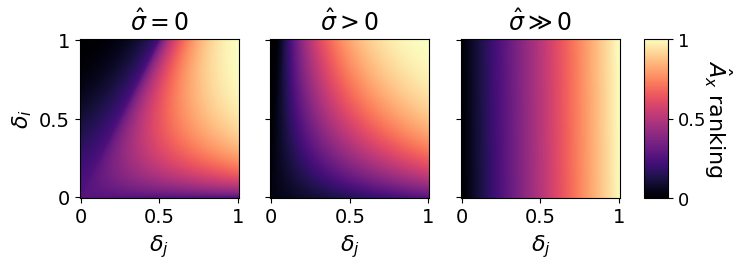

In [491]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

val_min = 0
val_max = 1
d_data = np.linspace(0,1,100)
d_unit = d_data#10*np.sort(disorder)
d_mean = 0.01
sigma_values = [0,10,10000]
X, Y = np.meshgrid(d_data,d_data)

gamma = 0.000

def Ax(d_data, d_unit, sigma, gamma):
    aux = sigma*d_mean*((1+gamma)**(-1))
    entry = -((d_unit+aux)/(1+gamma+sigma))*(((d_unit+aux)/(1+gamma+sigma))-2*d_data)
    return entry


# Calculate the values of A(x,y) for each point in the x-y plane

Ax_values = [Ax(X, Y, sigma,gamma) for sigma in sigma_values]

# Convert Ax_values to rankings
Ax_rankings = [np.argsort(np.argsort(Ax_val.ravel())).reshape(Ax_val.shape) for Ax_val in Ax_values]

# Create the heatmaps with reversed y-axis and actual x and y values as ticks
fig, axes = plt.subplots(1,len(sigma_values),figsize=(8,3))

# Define tick locations and labels
ticks = np.linspace(0, len(d_data) - 1, 3)
ticklabels = [0,0.5,1]
ticklabels_y = [0,0.5,1]
ticklabels = [0,0.5,1]
ticklabels_y = [0,0.5,1]

plots = []
for i, (sigma, Ax_rank) in enumerate(zip(sigma_values, Ax_rankings)):
    plot = axes[i].imshow(Ax_rank, cmap="magma")
    plots.append(plot)
    
    if (i == 0):
        axes[i].set_title("$\hat{\sigma} = 0$", fontsize=17)
        axes[i].set_ylabel('$\delta_i$', fontsize=16)
        axes[i].set_xticks(ticks)
        axes[i].set_xticklabels(ticklabels, rotation=0, fontsize=14)
        axes[i].set_yticks(ticks)
        axes[i].set_yticklabels(ticklabels, rotation=0, fontsize=14)
        axes[i].set_xlabel('$\delta_j$', fontsize=16)
        #axes[i].set_yticks([])
        
    if (i == 1):
        axes[i].set_title("$\hat{\sigma} > 0$", fontsize=17)
        axes[i].set_xticks(ticks)
        axes[i].set_xticklabels(ticklabels, rotation=0, fontsize=14)
        axes[i].set_xlabel('$\delta_j$', fontsize=16)
        axes[i].set_yticklabels([])
        
    if (i == 2):
        axes[i].set_title("$\hat{\sigma} \gg 0$", fontsize=17)
        axes[i].set_xticks(ticks)
        axes[i].set_xticklabels(ticklabels, rotation=0, fontsize=14)
        axes[i].set_xlabel('$\delta_j$', fontsize=16)
        axes[i].set_yticklabels([])

    axes[i].yaxis.tick_left()
    axes[i].set_yticks(ticks)
    #axes[i].set_yticklabels(ticklabels_y, rotation=0, fontsize=14)
    axes[i].invert_yaxis()

# ... [rest of your code]

# Adjust layout to make space for the colorbar
fig.subplots_adjust(right=0.8)

# Adjust layout to make space for the colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.83, 0.23, 0.03, 0.53])
cbar = fig.colorbar(plots[-1], cax=cbar_ax)

# Change the ticks on the colorbar
cbar_ticks = np.linspace(np.min(Ax_rankings[-1]), np.max(Ax_rankings[-1]), 3)  # 5 ticks from min to max
cbar.set_ticks(cbar_ticks)

# Change the tick labels on the colorbar
cbar_ticklabels = [0,0.5,1]
cbar.set_ticklabels(cbar_ticklabels)
cbar.set_label('$\hat{A}_x$ ranking',fontsize=16,rotation=270,labelpad=20)

# Change the font size of the tick labels
cbar.ax.tick_params(labelsize=13)  # Change 12 to your desired font size

plt.show()